In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
sheet_names = pd.ExcelFile("/Users/apple/Downloads/Assingment_Dataset.xlsx").sheet_names
sheet_names

['Geospatial Data',
 'Satellite Details',
 'News Reports',
 'Historical Incidents']

In [6]:
threat_assessment= pd.read_excel("/Users/apple/Downloads/Assingment_Dataset.xlsx", sheet_name='Historical Incidents')
threat_assessment

,Incident ID,Date,Location,Description,Outcome
0,1,2022-01-10,Border Post Alpha,Clashes between patrol units of Country A and ...,Temporary ceasefire reached
1,2,2022-02-05,Border Post Bravo,Unconfirmed reports of border incursion,Investigation launched
2,3,2022-03-12,Border Post Charlie,Artillery fire exchanged between military units,Ceasefire negotiations initiated
3,4,2022-04-20,Border Post Delta,Civilians caught in crossfire during border sk...,Humanitarian aid dispatched
4,5,2022-05-25,Border Post Echo,Surveillance drones detected unauthorized move...,Increased border patrols
5,6,2022-06-15,Border Post Alpha,Reports of unauthorized military exercises,Diplomatic protests issued
6,7,2022-07-22,Border Post Bravo,Alleged sabotage of border security infrastruc...,Repairs undertaken
7,8,2022-08-30,Border Post Charlie,Cross-border shelling from both sides,Ceasefire declared
8,9,2022-09-18,Border Post Delta,Large troop movement detected near border,Increased surveillance and alerts
9,10,2022-10-25,Border Post Echo,Exchange of gunfire between border guards,Emergency measures enacted


In [7]:
threat_assessment.columns

Index(['Incident ID', 'Date', 'Location', 'Description', 'Outcome'], dtype='object')

In [8]:
threat_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Incident ID  30 non-null     int64         
 1   Date         30 non-null     datetime64[ns]
 2   Location     30 non-null     object        
 3   Description  30 non-null     object        
 4   Outcome      30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ KB


In [12]:
threat_assessment.describe()

,Incident ID
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [13]:
threat_assessment.isnull().sum()

Incident ID    0
Date           0
Location       0
Description    0
Outcome        0
dtype: int64

In [33]:
# Count incidents by location
incident_counts = threat_assessment['Location'].value_counts()
incident_counts

Border Post Alpha      6
Border Post Bravo      6
Border Post Charlie    6
Border Post Delta      6
Border Post Echo       6
Name: Location, dtype: int64

In [15]:
location_time = threat_assessment.groupby(['Location', pd.Grouper(key='Date', freq='M')]).size().unstack(fill_value=0)
location_time

Date,2022-01-31,2022-06-30,2023-01-31,2023-06-30,2023-11-30,2024-04-30,2022-02-28,2022-07-31,2023-02-28,2023-07-31,...,2023-04-30,2023-09-30,2024-02-29,2024-07-31,2022-05-31,2022-10-31,2023-05-31,2023-10-31,2024-03-31,2024-08-31
Location,,,,,,,,,,,,,,,,,,,,,
Border Post Alpha,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Border Post Bravo,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Border Post Charlie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Border Post Delta,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
Border Post Echo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [16]:
recent_incidents = threat_assessment[threat_assessment['Date'] >= '2023-01-01']
recent_summary = recent_incidents.groupby(['Location', 'Description']).size().reset_index(name='Count')
recent_summary
     


,Location,Description,Count
0,Border Post Alpha,Increased surveillance detected near the border,1
1,Border Post Alpha,Incursion by armed groups detected,1
2,Border Post Alpha,Military unit incursion reported,1
3,Border Post Alpha,Reports of sabotage of border facilities,1
4,Border Post Bravo,Accusations of border encroachment,1
5,Border Post Bravo,Exchange of fire involving local militias,1
6,Border Post Bravo,Reports of infiltration attempts by cross-bord...,1
7,Border Post Bravo,Skirmish between local militias and border pat...,1
8,Border Post Charlie,Border skirmish involving artillery fire,1
9,Border Post Charlie,Cross-border artillery attack,1


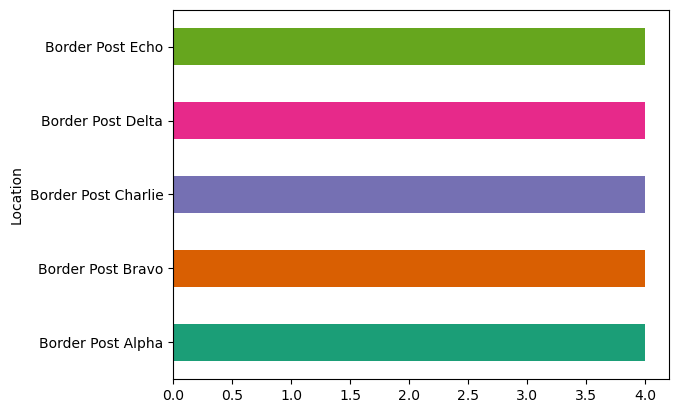

In [30]:
recent_summary.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [32]:
# Count incidents by location
incident_frequency = threat_assessment['Location'].value_counts()
incident_frequency

Border Post Alpha      6
Border Post Bravo      6
Border Post Charlie    6
Border Post Delta      6
Border Post Echo       6
Name: Location, dtype: int64

<AxesSubplot:title={'center':'Incident Frequency by Border Post'}>

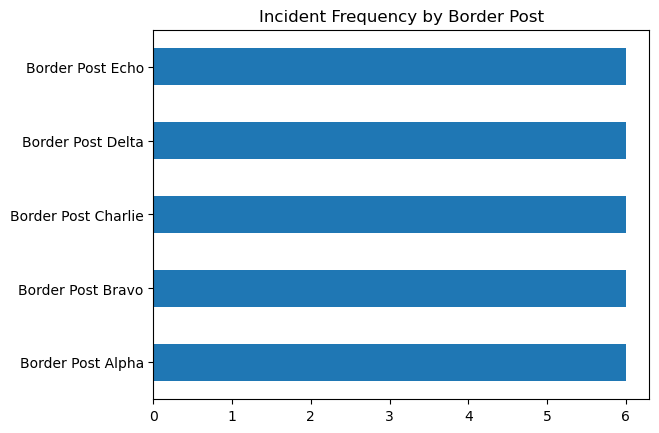

In [35]:
# Visualize the incident frequency
incident_frequency.plot(kind='barh', title='Incident Frequency by Border Post')


In [37]:
# Group by year and month to see trends over time
threat_assessment['YearMonth'] = threat_assessment['Date'].dt.to_period('M')
threat_assessment.head()

,Incident ID,Date,Location,Description,Outcome,YearMonth
0,1,2022-01-10,Border Post Alpha,Clashes between patrol units of Country A and ...,Temporary ceasefire reached,2022-01
1,2,2022-02-05,Border Post Bravo,Unconfirmed reports of border incursion,Investigation launched,2022-02
2,3,2022-03-12,Border Post Charlie,Artillery fire exchanged between military units,Ceasefire negotiations initiated,2022-03
3,4,2022-04-20,Border Post Delta,Civilians caught in crossfire during border sk...,Humanitarian aid dispatched,2022-04
4,5,2022-05-25,Border Post Echo,Surveillance drones detected unauthorized move...,Increased border patrols,2022-05


YearMonth
2022-01    1
2022-02    1
2022-03    1
2022-04    1
2022-05    1
2022-06    1
2022-07    1
2022-08    1
2022-09    1
2022-10    1
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
2023-06    1
2023-07    1
2023-08    1
2023-09    1
2023-10    1
2023-11    1
2023-12    1
2024-01    1
2024-02    1
2024-03    1
2024-04    1
2024-05    1
2024-06    1
2024-07    1
2024-08    1
Freq: M, dtype: int64

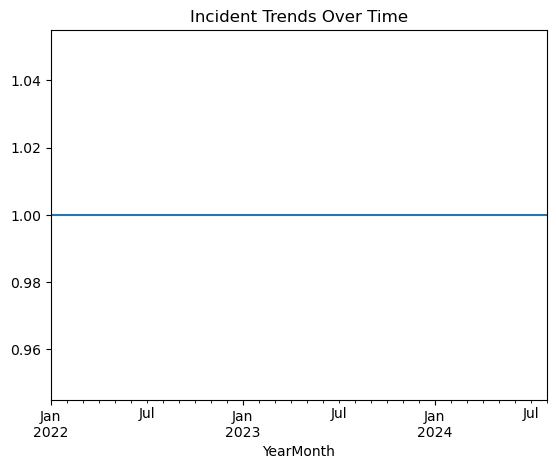

In [42]:
incident_trends = threat_assessment.groupby('YearMonth').size()
incident_trends.plot(kind='line', title='Incident Trends Over Time')
incident_trends

<AxesSubplot:title={'center':'Incident Types'}>

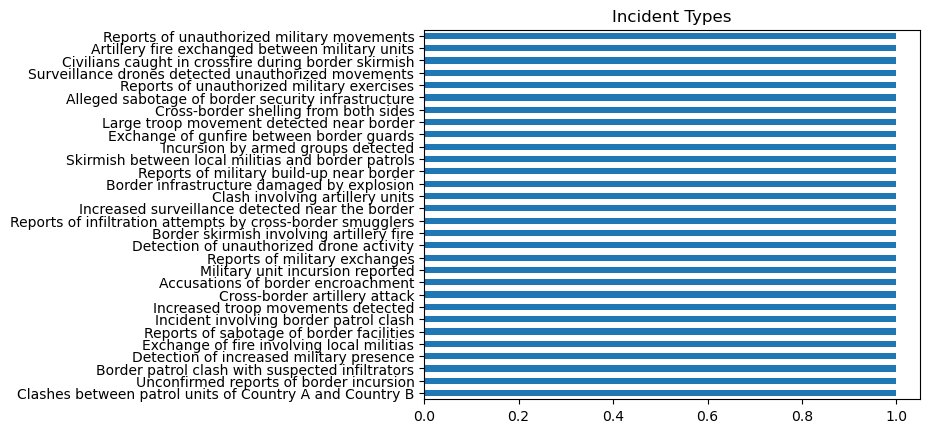

In [21]:
# Count incidents by type (Description)
incident_type_count = threat_assessment['Description'].value_counts()
# Count incidents by outcome
incident_outcome_count = threat_assessment['Outcome'].value_counts()
# Visualize incident types and outcomes
incident_type_count.plot(kind='barh', title='Incident Types')


<AxesSubplot:title={'center':'Incident Outcomes'}>

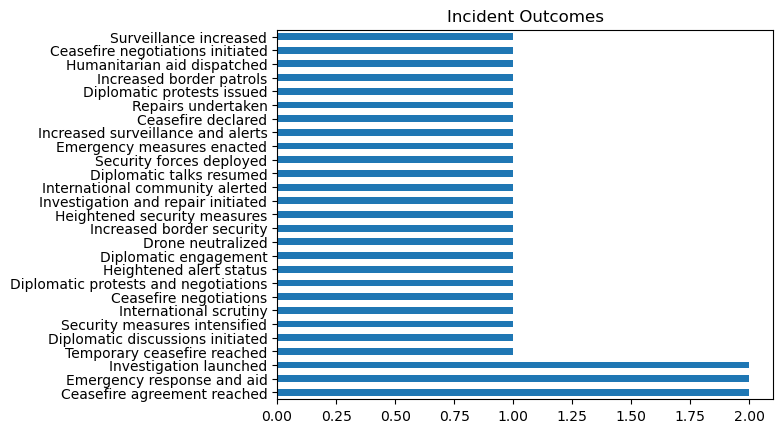

In [46]:
incident_outcome_count.plot(kind='barh', title='Incident Outcomes')

In [48]:
# Pivot table to correlate incidents with locations
incident_correlation = threat_assessment.pivot_table(index='Location', columns='Description', aggfunc='size', fill_value=0)
incident_correlation

Description,Accusations of border encroachment,Alleged sabotage of border security infrastructure,Artillery fire exchanged between military units,Border infrastructure damaged by explosion,Border patrol clash with suspected infiltrators,Border skirmish involving artillery fire,Civilians caught in crossfire during border skirmish,Clash involving artillery units,Clashes between patrol units of Country A and Country B,Cross-border artillery attack,...,Military unit incursion reported,Reports of infiltration attempts by cross-border smugglers,Reports of military build-up near border,Reports of military exchanges,Reports of sabotage of border facilities,Reports of unauthorized military exercises,Reports of unauthorized military movements,Skirmish between local militias and border patrols,Surveillance drones detected unauthorized movements,Unconfirmed reports of border incursion
Location,,,,,,,,,,,,,,,,,,,,,
Border Post Alpha,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
Border Post Bravo,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
Border Post Charlie,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Border Post Delta,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Border Post Echo,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


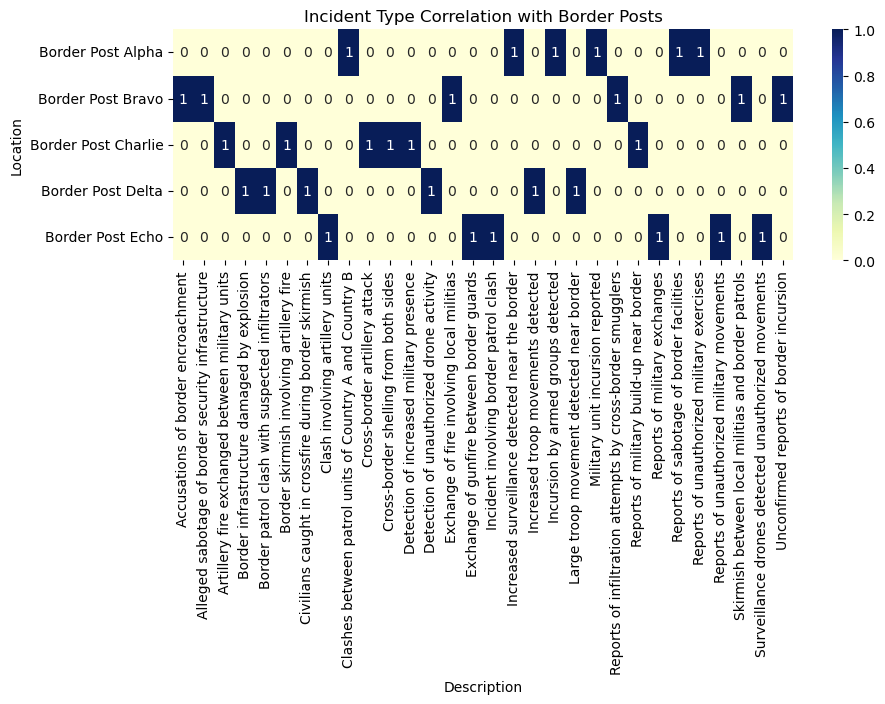

In [28]:
# Heatmap for better visualization (requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
sns.heatmap(incident_correlation, annot=True, cmap="YlGnBu")
plt.title('Incident Type Correlation with Border Posts')
plt.show()

In [52]:
# high-risk area identification
high_risk_areas = threat_assessment[threat_assessment['Description'].str.contains('military|skirmish|incursion')]
high_risk_areas

,Incident ID,Date,Location,Description,Outcome,YearMonth
1,2,2022-02-05,Border Post Bravo,Unconfirmed reports of border incursion,Investigation launched,2022-02
2,3,2022-03-12,Border Post Charlie,Artillery fire exchanged between military units,Ceasefire negotiations initiated,2022-03
3,4,2022-04-20,Border Post Delta,Civilians caught in crossfire during border sk...,Humanitarian aid dispatched,2022-04
5,6,2022-06-15,Border Post Alpha,Reports of unauthorized military exercises,Diplomatic protests issued,2022-06
12,13,2023-03-14,Border Post Charlie,Reports of military build-up near border,International community alerted,2023-03
17,18,2023-08-20,Border Post Charlie,Border skirmish involving artillery fire,Emergency response and aid,2023-08
19,20,2023-10-05,Border Post Echo,Reports of military exchanges,Diplomatic engagement,2023-10
20,21,2023-11-12,Border Post Alpha,Military unit incursion reported,Heightened alert status,2023-11
27,28,2024-06-15,Border Post Charlie,Detection of increased military presence,Security measures intensified,2024-06
29,30,2024-08-01,Border Post Echo,Reports of unauthorized military movements,Surveillance increased,2024-08
